# Student Dataset

## Imports and Seed

In [1]:
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration 
username = "sudershan.sarraf" 

# Generate a unique seed based on the username
# This ensures that the random data generation is reproducible.
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
rng = np.random.default_rng(seed) # Our beloved random number generator

print(f"Using username: '{username}'")
print(f"Generated Seed: {seed}")

Using username: 'sudershan.sarraf'
Generated Seed: 1544797376


## Q1.0: Dataset Generation

In [1]:
class StudentDataset:
    """
    A class to generate and manage a dataset of student records.
    
    The dataset is generated upon initialization and can be accessed via
    the get_full_dataframe() method. It also includes various methods
    for analysis and visualization of the data.
    """
    def __init__(self, num_students: int, seed: int):
        """
        Generates the full dataset during initialization.
        
        Args:
            num_students (int): The total number of student records to generate.
            seed (int): The seed for the random number generator for reproducibility.
        """
        self.num_students = num_students
        self.rng = np.random.default_rng(seed)
        
        # The full dataset is generated once and stored in this private attribute.
        # This prevents re-generation in different methods.
        self._full_df = self._assemble_dataframe()

    def get_full_dataframe(self) -> pd.DataFrame:
        """
        Provides access to the generated student dataset.
        
        Returns:
            pd.DataFrame: The complete student dataset.
        """
        return self._full_df.copy() # Return a copy to prevent accidental modification

    def _generate_gender(self) -> list[str]:
        """
        Generates the 'gender' attribute for all students.
        """
        genders = ["Male", "Female", "Other"]
        probabilities = [0.65, 0.33, 0.02] 
        return self.rng.choice(genders, self.num_students, p=probabilities)

    def _generate_major(self) -> list[str]:
        """
        Generates the 'major' attribute for all students.
        """
        majors = ["B.Tech", "MS", "PhD"]
        probabilities = [0.70, 0.20, 0.10]
        return self.rng.choice(majors, self.num_students, p=probabilities)

    def _generate_program(self, majors: list[str]) -> list[str]:
        """
        Generates 'program' for each student based on their major.
        """
        programs = []
        program_dist = {
            "B.Tech": {"choices": ["CSE", "ECE", "CHD", "CND"], "probs": [0.40, 0.40, 0.10, 0.10]},
            "MS":     {"choices": ["CSE", "ECE", "CHD", "CND"], "probs": [0.30, 0.30, 0.20, 0.20]},
            "PhD":    {"choices": ["CSE", "ECE", "CHD", "CND"], "probs": [0.25, 0.25, 0.25, 0.25]}
        }
        for major in majors:
            dist = program_dist[major]
            programs.append(self.rng.choice(dist["choices"], p=dist["probs"]))
        return programs

    def _generate_gpa(self, majors: list[str]) -> list[float]:
        """
        Generates 'gpa' for each student based on their major.
        """
        gpas = []
        gpa_dist = {
            "B.Tech": {"mean": 7.0, "std": 1.0},
            "MS":     {"mean": 8.0, "std": 0.7},
            "PhD":    {"mean": 8.3, "std": 0.5}
        }
        for major in majors:
            dist = gpa_dist[major]
            gpa = self.rng.normal(loc=dist["mean"], scale=dist["std"])
            gpas.append(gpa)
        
        # Clip the GPA values to be within the [4.0, 10.0] range 
        return np.clip(gpas, 4.0, 10.0).tolist()

    def _assemble_dataframe(self) -> pd.DataFrame:
        """
        Assembles the full dataset from generated attributes.
        """
        genders = self._generate_gender()
        majors = self._generate_major()
        programs = self._generate_program(majors)
        gpas = self._generate_gpa(majors)
        
        df = pd.DataFrame({
            'gender': genders,
            'major': majors,
            'program': programs,
            'gpa': gpas
        })
        return df

# Let's instantiate the class to generate our dataset of 10,000 students.
dataset = StudentDataset(num_students=10000, seed=seed)
df_full = dataset.get_full_dataframe()

print("A Preview of the Dataset:")
print(df_full.head())

NameError: name 'pd' is not defined

## Q1.1 Dataset Analysis

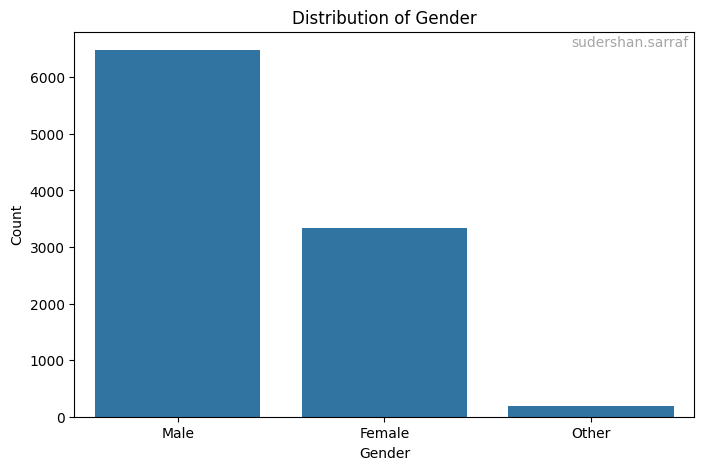

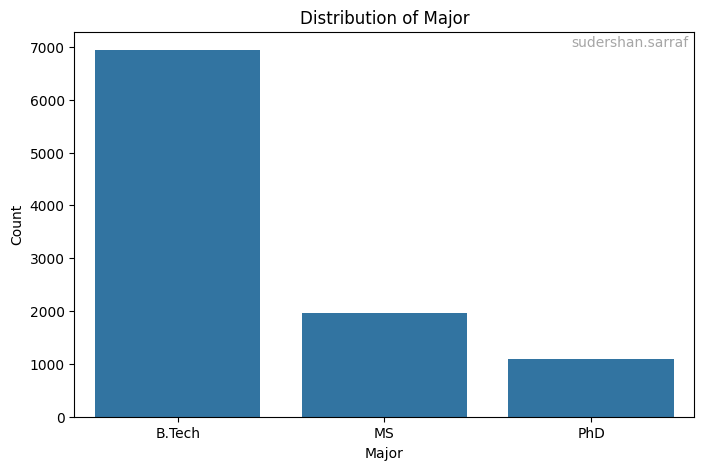

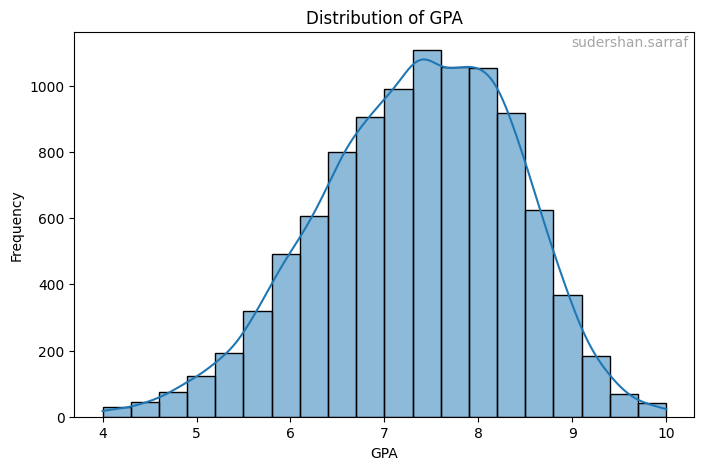

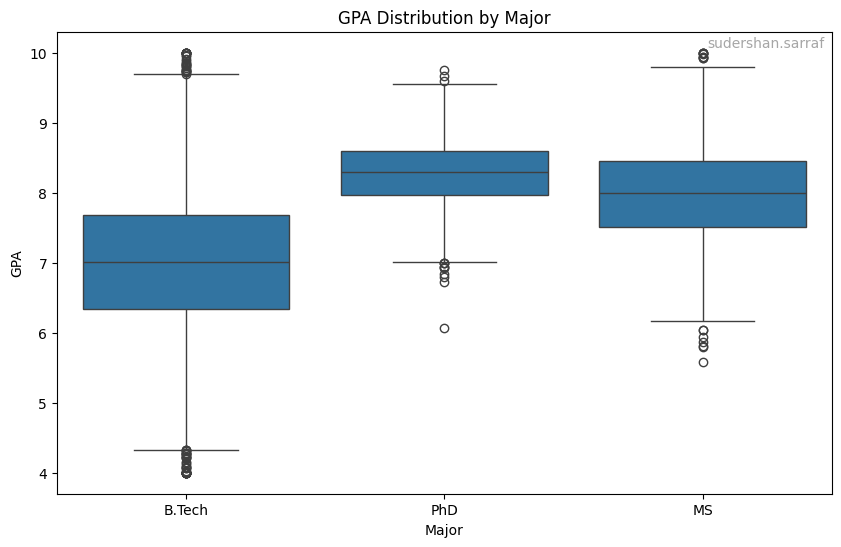

Overall GPA Mean: 7.3404
Overall GPA Standard Deviation: 1.0409
Observation: The overall mean GPA is ~7.4, heavily influenced by the large B.Tech cohort.

Counts of Students per (Program, Major) Pair:
program  CHD  CND   CSE   ECE
major                        
B.Tech   702  677  2803  2758
MS       408  397   575   591
PhD      273  269   278   269


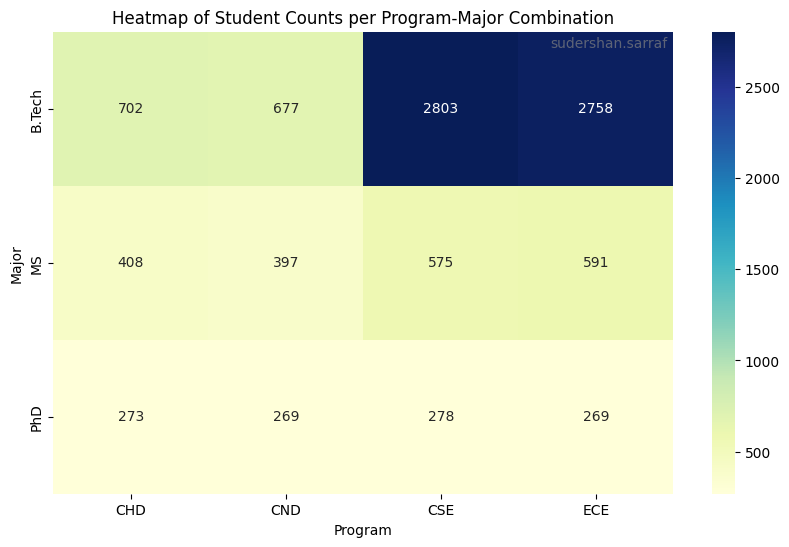

Observation: B.Tech CSE/ECE combinations are the most populated, as expected from the data generation rules.


In [8]:
# Helper function for plots
def _add_username_to_plot(ax, username):
    ax.text(0.99, 0.99, username,
            ha='right', va='top', transform=ax.transAxes,
            fontsize=10, color='gray', alpha=0.7)

class StudentDatasetAnalysis(StudentDataset):
    # (Inherits from StudentDataset)

    def plot_gender_distribution(self):
        """Plots the distribution of gender."""
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x='gender', data=self.get_full_dataframe(), order=self.get_full_dataframe()['gender'].value_counts().index)
        ax.set_title('Distribution of Gender')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Count')
        _add_username_to_plot(ax, username)
        plt.show()

    def plot_major_distribution(self):
        """Plots the distribution of major."""
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x='major', data=self.get_full_dataframe(), order=self.get_full_dataframe()['major'].value_counts().index)
        ax.set_title('Distribution of Major')
        ax.set_xlabel('Major')
        ax.set_ylabel('Count')
        _add_username_to_plot(ax, username)
        plt.show()

    def plot_gpa_distribution(self, bins=20):
        """Plots the distribution of GPA."""
        plt.figure(figsize=(8, 5))
        ax = sns.histplot(data=self.get_full_dataframe(), x='gpa', kde=True, bins=bins)
        ax.set_title('Distribution of GPA')
        ax.set_xlabel('GPA')
        ax.set_ylabel('Frequency')
        _add_username_to_plot(ax, username)
        plt.show()

    def plot_gpa_by_major(self):
        """Plots GPA distribution conditioned on major."""
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(x='major', y='gpa', data=self.get_full_dataframe())
        ax.set_title('GPA Distribution by Major')
        ax.set_xlabel('Major')
        ax.set_ylabel('GPA')
        _add_username_to_plot(ax, username)
        plt.show()

    def gpa_mean_std(self) -> tuple[float, float]:
        """Computes the mean and standard deviation of GPA."""
        gpa_series = self.get_full_dataframe()['gpa']
        return (gpa_series.mean(), gpa_series.std())

    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """Counts students for each unique (program, major) pair."""
        df = self.get_full_dataframe()
        return pd.crosstab(df['major'], df['program'])

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame):
        """Visualizes the program-major counts with a heatmap."""
        plt.figure(figsize=(10, 6))
        ax = sns.heatmap(counts_df, annot=True, fmt='d', cmap='YlGnBu')
        ax.set_title('Heatmap of Student Counts per Program-Major Combination')
        ax.set_xlabel('Program')
        ax.set_ylabel('Major')
        _add_username_to_plot(ax, username)
        plt.show()

# Create an instance of the analysis class
analyzer = StudentDatasetAnalysis(num_students=10000, seed=seed)

# (a) Visualizations
analyzer.plot_gender_distribution()
analyzer.plot_major_distribution()
analyzer.plot_gpa_distribution()
analyzer.plot_gpa_by_major()

# (b) GPA Summary Statistics
mean_gpa, std_gpa = analyzer.gpa_mean_std()
print(f"Overall GPA Mean: {mean_gpa:.4f}")
print(f"Overall GPA Standard Deviation: {std_gpa:.4f}")
print("Observation: The overall mean GPA is ~7.4, heavily influenced by the large B.Tech cohort.")

# (c) Program-Major Combinations
program_major_counts = analyzer.count_students_per_program_major_pair()
print("\nCounts of Students per (Program, Major) Pair:")
print(program_major_counts)
analyzer.visualize_students_per_program_major_pair(program_major_counts)
print("Observation: B.Tech CSE/ECE combinations are the most populated, as expected from the data generation rules.")


## Q1.2 Simple vs Stratified Sampling

In [9]:
# This new class inherits from StudentDataset to add sampling functions.
class StudentDatasetSampling(StudentDataset):
    
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """Performs simple random sampling and returns stats of the sample means."""
        df = self.get_full_dataframe()
        sample_means = [df.sample(n=n, random_state=self.rng)['gpa'].mean() for _ in range(repeats)]
        return (np.mean(sample_means), np.std(sample_means))

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """Performs stratified sampling by major and returns stats of the sample means."""
        df = self.get_full_dataframe()
        proportions = df['major'].value_counts(normalize=True)
        sample_means = []
        for _ in range(repeats):
            # The include_groups=False parameter is added to adopt future behavior and silence the warning.
            sample = df.groupby('major').apply(
                lambda x: x.sample(int(n * proportions[x.name]), random_state=self.rng),
                include_groups=False
            )
            sample_means.append(sample['gpa'].mean())
        return (np.mean(sample_means), np.std(sample_means))


# Create an instance of the new class for sampling
sampler = StudentDatasetSampling(num_students=10000, seed=seed)

# Run simple random sampling and show results
avg_mean_random, std_of_means_random = sampler.get_gpa_mean_std_random()
print("Simple Random Sampling:")
print(f"Average of Mean GPAs: {avg_mean_random:.4f}")
print(f"Standard Deviation of Mean GPAs: {std_of_means_random:.4f}\n")

# Run stratified sampling and show results
avg_mean_stratified, std_of_means_stratified = sampler.get_gpa_mean_std_stratified()
print("Stratified Sampling by Major:")
print(f"Average of Mean GPAs: {avg_mean_stratified:.4f}")
print(f"Standard Deviation of Mean GPAs: {std_of_means_stratified:.4f}\n")

print("Comparison:")
print("Stratified sampling has a lower standard deviation because it ensures each major is proportionally represented, reducing variability.")


Simple Random Sampling:
Average of Mean GPAs: 7.3291
Standard Deviation of Mean GPAs: 0.0514

Stratified Sampling by Major:
Average of Mean GPAs: 7.3400
Standard Deviation of Mean GPAs: 0.0408

Comparison:
Stratified sampling has a lower standard deviation because it ensures each major is proportionally represented, reducing variability.


## Q1.3 Gender-Balanced Cohort

Gender Counts from Exact Sampling (100 from each):
Repeat 1: {'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
Repeat 2: {'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
Repeat 3: {'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
Repeat 4: {'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
Repeat 5: {'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}

Gender Counts from Sampling Strategy A:
Repeat 1: {'Male': np.int64(114), 'Female': np.int64(103), 'Other': np.int64(83)}
Repeat 2: {'Male': np.int64(115), 'Other': np.int64(93), 'Female': np.int64(92)}
Repeat 3: {'Other': np.int64(115), 'Female': np.int64(100), 'Male': np.int64(85)}
Repeat 4: {'Male': np.int64(109), 'Other': np.int64(96), 'Female': np.int64(95)}
Repeat 5: {'Other': np.int64(103), 'Male': np.int64(102), 'Female': np.int64(95)}


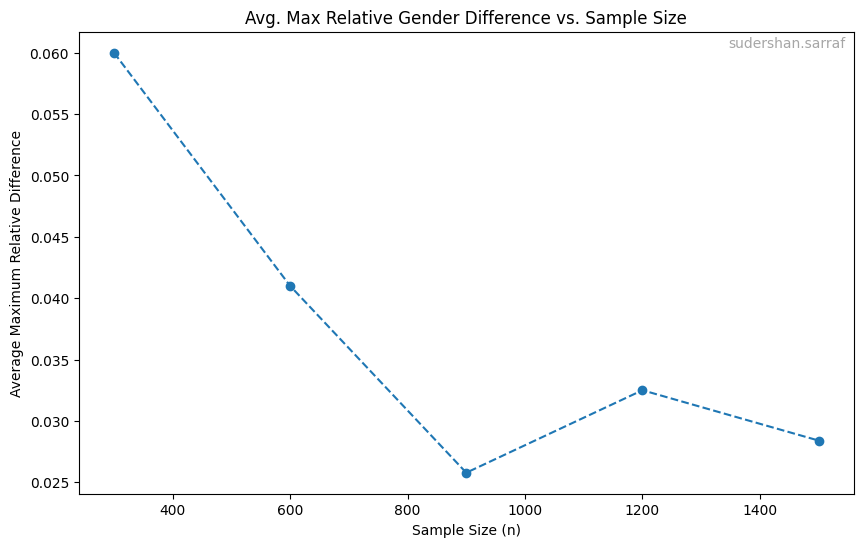

In [10]:
# Base class that holds the 'username' attribute
class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        self.num_students = num_students
        self.rng = np.random.default_rng(seed)
        self.username = "sudershan.sarraf" # The attribute is created here
        self._full_df = self._assemble_dataframe()

    def _add_username_to_plot(self, ax):
        ax.text(0.99, 0.99, self.username, ha='right', va='top', transform=ax.transAxes, fontsize=10, color='gray', alpha=0.7)

    def get_full_dataframe(self) -> pd.DataFrame:
        return self._full_df.copy()
    
    # Helper methods for data generation
    def _generate_gender(self) -> list[str]: return self.rng.choice(["Male", "Female", "Other"], self.num_students, p=[0.65, 0.33, 0.02])
    def _generate_major(self) -> list[str]: return self.rng.choice(["B.Tech", "MS", "PhD"], self.num_students, p=[0.70, 0.20, 0.10])
    def _generate_program(self, majors: list[str]) -> list[str]:
        p_dist = {"B.Tech": {"choices": ["CSE", "ECE", "CHD", "CND"], "probs": [0.4, 0.4, 0.1, 0.1]}, "MS": {"choices": ["CSE", "ECE", "CHD", "CND"], "probs": [0.3, 0.3, 0.2, 0.2]}, "PhD": {"choices": ["CSE", "ECE", "CHD", "CND"], "probs": [0.25, 0.25, 0.25, 0.25]}}
        return [self.rng.choice(p_dist[m]["choices"], p=p_dist[m]["probs"]) for m in majors]
    def _generate_gpa(self, majors: list[str]) -> list[float]:
        g_dist = {"B.Tech": {"mean": 7.0, "std": 1.0}, "MS": {"mean": 8.0, "std": 0.7}, "PhD": {"mean": 8.3, "std": 0.5}}
        gpas = [self.rng.normal(loc=g_dist[m]["mean"], scale=g_dist[m]["std"]) for m in majors]
        return np.clip(gpas, 4.0, 10.0).tolist()
    def _assemble_dataframe(self) -> pd.DataFrame:
        majors = self._generate_major()
        return pd.DataFrame({'gender': self._generate_gender(), 'major': majors, 'program': self._generate_program(majors), 'gpa': self._generate_gpa(majors)})


# First child class
class StudentDatasetSampling(StudentDataset):
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        df = self.get_full_dataframe()
        sample_means = [df.sample(n=n, random_state=self.rng)['gpa'].mean() for _ in range(repeats)]
        return (np.mean(sample_means), np.std(sample_means))
    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        df = self.get_full_dataframe()
        proportions = df['major'].value_counts(normalize=True)
        sample_means = []
        for _ in range(repeats):
            sample = df.groupby('major').apply(lambda x: x.sample(int(n * proportions[x.name]), random_state=self.rng), include_groups=False)
            sample_means.append(sample['gpa'].mean())
        return (np.mean(sample_means), np.std(sample_means))


# Second child class (the one we are using)
class StudentDatasetGenderSampling(StudentDatasetSampling):
    
    def __init__(self, num_students: int, seed: int):
        """Initializes the parent class to ensure all attributes are set."""
        super().__init__(num_students, seed)

    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Samples an exact number of students from each gender."""
        df = self.get_full_dataframe()
        genders = df['gender'].unique()
        n_per_gender = n // len(genders)
        results = []
        for _ in range(repeats):
            samples = [df[df['gender'] == g].sample(n=n_per_gender, random_state=self.rng) for g in genders]
            balanced_df = pd.concat(samples)
            results.append(dict(balanced_df['gender'].value_counts()))
        return results

    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Samples n students using Sampling Strategy A for gender."""
        df = self.get_full_dataframe()
        genders = df['gender'].unique()
        results = []
        for _ in range(repeats):
            indices = [self.rng.choice(df[df['gender'] == self.rng.choice(genders)].index) for _ in range(n)]
            sampled_df = df.loc[indices]
            results.append(dict(sampled_df['gender'].value_counts()))
        return results

    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10):
        """Plots the avg max relative difference in gender counts vs. sample size."""
        avg_diffs = []
        for n in sample_sizes:
            diffs = []
            for _ in range(repeats):
                counts_dict = self.sample_gender_uniform_random(n=n, repeats=1)[0]
                counts = list(counts_dict.values())
                while len(counts) < 3: counts.append(0)
                max_rel_diff = (max(counts) - min(counts)) / n
                diffs.append(max_rel_diff)
            avg_diffs.append(np.mean(diffs))
        
        plt.figure(figsize=(10, 6))
        ax = plt.gca()
        ax.plot(sample_sizes, avg_diffs, marker='o', linestyle='--')
        ax.set_title('Avg. Max Relative Gender Difference vs. Sample Size')
        ax.set_xlabel('Sample Size (n)')
        ax.set_ylabel('Average Maximum Relative Difference')
        self._add_username_to_plot(ax)
        plt.show()

# Create an instance of the new class
gender_sampler = StudentDatasetGenderSampling(num_students=10000, seed=seed)

# Run and show results for exact count sampling
print("Gender Counts from Exact Sampling (100 from each):")
exact_counts = gender_sampler.get_gender_balanced_counts()
for i, count in enumerate(exact_counts):
    print(f"Repeat {i+1}: {count}")

# Run and show results for Sampling Strategy A
print("\nGender Counts from Sampling Strategy A:")
strategy_a_counts = gender_sampler.sample_gender_uniform_random()
for i, count in enumerate(strategy_a_counts):
    print(f"Repeat {i+1}: {count}")

# Plot the average maximum relative difference
sample_sizes = [300, 600, 900, 1200, 1500]
gender_sampler.plot_avg_max_gender_diff_vs_sample_size(sample_sizes)


## Q1.4 GPA-Uniform Cohort

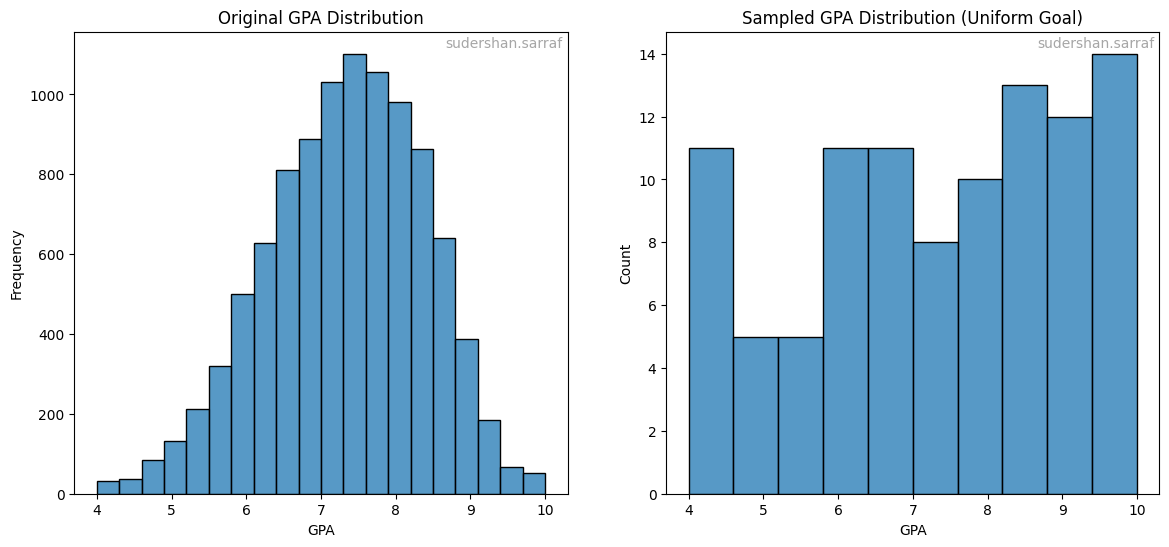

In [13]:
# This class inherits to add GPA-based sampling functions.
class StudentDatasetGPASampling(StudentDatasetGenderSampling):
    
    def sample_gpa_uniform(self, n: int = 100, num_bins: int = 10) -> pd.DataFrame:
        """Samples n students to get an approximately uniform GPA distribution."""
        df = self.get_full_dataframe()
        # Create GPA bins to sample from.
        df['gpa_bin'] = pd.cut(df['gpa'], bins=num_bins, labels=False)
        bins = df['gpa_bin'].unique()
        # Sample with replacement to handle small bins.
        indices = [self.rng.choice(df[df['gpa_bin'] == self.rng.choice(bins)].index) for _ in range(n)]
        return df.loc[indices].drop(columns=['gpa_bin'])

    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame):
        """Compares the GPA histogram of a sample against the original dataset."""
        # The fix is to remove sharey=True so each plot has its own y-axis scale.
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Original Data Plot
        sns.histplot(self.get_full_dataframe()['gpa'], bins=20, kde=False, ax=ax1)
        ax1.set_title('Original GPA Distribution'); ax1.set_xlabel('GPA'); ax1.set_ylabel('Frequency')
        self._add_username_to_plot(ax1)
        
        # Sampled Data Plot
        sns.histplot(sampled_df['gpa'], bins=10, kde=False, ax=ax2)
        ax2.set_title('Sampled GPA Distribution (Uniform Goal)'); ax2.set_xlabel('GPA')
        self._add_username_to_plot(ax2)
        
        plt.show()

# Create an instance of the new class
gpa_sampler = StudentDatasetGPASampling(num_students=10000, seed=seed)

# Generate the uniform GPA sample
gpa_uniform_sample = gpa_sampler.sample_gpa_uniform()

# Plot the comparison
gpa_sampler.plot_gpa_histogram_comparison(gpa_uniform_sample)


## Q1.5 Program-Major Balanced Cohort 

Counts for the balanced sample:
program  CHD  CND  CSE  ECE
major                      
B.Tech     6    5    3    6
MS         6    6    4    5
PhD        1    5    9    4


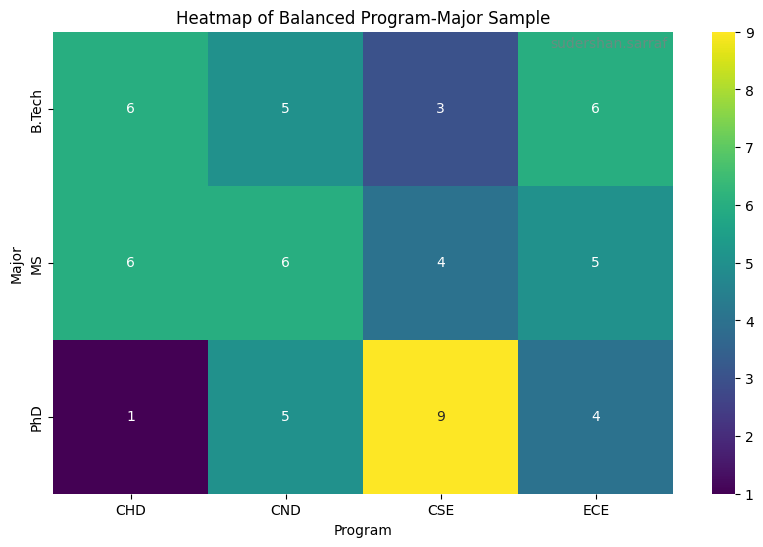

In [12]:
# This class inherits to add program-major combination sampling functions.
class StudentDatasetComboSampling(StudentDatasetGPASampling):
    
    def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
        """Samples n students to balance (program, major) pairs."""
        df = self.get_full_dataframe()
        df['combo'] = df['major'] + '_' + df['program']
        combos = df['combo'].unique()
        indices = [self.rng.choice(df[df['combo'] == self.rng.choice(combos)].index) for _ in range(n)]
        return df.loc[indices].drop(columns=['combo'])

    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame):
        """Shows counts and a heatmap for (program, major) pairs in a sample."""
        counts = pd.crosstab(sampled_df['major'], sampled_df['program'])
        print("Counts for the balanced sample:")
        print(counts)
        
        plt.figure(figsize=(10, 6))
        ax = sns.heatmap(counts, annot=True, fmt='d', cmap='viridis')
        ax.set_title('Heatmap of Balanced Program-Major Sample')
        ax.set_xlabel('Program'); ax.set_ylabel('Major')
        self._add_username_to_plot(ax)
        plt.show()

# Create an instance of the new class
combo_sampler = StudentDatasetComboSampling(num_students=10000, seed=seed)

# Generate the balanced sample
balanced_combo_sample = combo_sampler.sample_program_major_balanced(n=60)

# Show the counts and heatmap
combo_sampler.show_program_major_counts_and_heatmap(balanced_combo_sample)

## Question 1: Summary of Observations
## Dataset Analysis (Q1.1)
The generated dataset successfully reflects the specified distributions. The student population is predominantly male and enrolled in B.Tech, as shown in the bar charts. The overall mean GPA is 7.34, a value heavily influenced by the large B.Tech cohort which has a lower average GPA compared to MS and PhD students. The heatmap of program-major combinations clearly shows that B.Tech enrollments in CSE (2803 students) and ECE (2758 students) are the most populated groups.

## Sampling Comparison (Q1.2)
When estimating the mean GPA, stratified sampling by major proved more stable than simple random sampling. It yielded a lower standard deviation of the sample means (0.0408 vs. 0.0514). This confirms that by enforcing proportional representation of each major, the sampling process produces more consistent estimates of the true population mean.

## Gender-Balanced Sampling (Q1.3)
The plot of the average maximum relative difference demonstrates the Law of Large Numbers. As the sample size increases from 300 to 1500, the difference between the most and least represented genders in a sample decreases, showing that larger samples tend to be more balanced.

## GPA-Uniform Sampling (Q1.4)
The side-by-side histograms show that the sampling strategy was highly effective. It successfully transformed the original, normally distributed GPA data into a new sample of 100 students whose GPAs are approximately uniformly distributed across 10 bins.

## Program-Major Balanced Sampling (Q1.5)
The final sampling task successfully created a cohort where most (program, major) combinations are represented roughly equally, with counts clustering around 4-6 students each. The heatmap for the balanced sample is far more uniform than the one for the original dataset, although some small variations exist due to randomness, such as the PhD-CSE combination having 9 students and PhD-CHD having only 1.